<center><b><font size=6>Machine Learning for Networking <b><center>
<center><b><font size=6>Lab 10 <b><center>
<center><b><font size=6>   Neural networks <b><center>


**Pytorch** is one of the most popular Python library for deep learning tasks and it is highly configurable. In this lab, you will learn how to define a feedforward neural network for supervised problems.

Useful link: <a href="https://pytorch.org/docs/stable/index.html">documentation</a>, <a href="https://pytorch.org/tutorials/beginner/basics/intro.html">basics</a>, <a href="https://pytorch.org/tutorials/beginner/pytorch_with_examples.html">examples</a>.

In [79]:
# To install pytorch. Then restart kernel. 
# WARNING: it takes around 5 minutes

!python -m pip install torch
!python -m pip install torchvision

In [80]:
import torch
print(torch.__version__)

2.7.1


# **PyTorch Basics Tutorial**

## 1. Tensors
Tensors are similar to NumPy’s ndarrays, with the addition being that Tensors can also be used on a GPU to accelerate computing.

### 1.1 Creating Tensors from data
Tensors can be created from Python lists with the `torch.Tensor()` function.

In [81]:
# Example with 1-D data
data = [1.0, 2.0, 3.0]
tensor = torch.Tensor(data)
print("Example with 1-D data")
print(tensor)
print(tensor.shape)


# Example with 2-D data
data = [[1., 2., 3.], [4., 5., 6]]
tensor = torch.Tensor(data)
print("\nExample with 2-D data")
print(tensor)
print(tensor.shape)


# Example with 3-D data
data = [[[1.,2.], [3.,4.]],
        [[5.,6.], [7.,8.]]]
tensor = torch.Tensor(data)
print("\nExample with 3-D data")
print(tensor)
print(tensor.shape)


Example with 1-D data
tensor([1., 2., 3.])
torch.Size([3])

Example with 2-D data
tensor([[1., 2., 3.],
        [4., 5., 6.]])
torch.Size([2, 3])

Example with 3-D data
tensor([[[1., 2.],
         [3., 4.]],

        [[5., 6.],
         [7., 8.]]])
torch.Size([2, 2, 2])


### 1.2 Initializing an empty Tensor
An uninitialized matrix is declared, but does not contain definite known values before it is used. When an uninitialized matrix is created, whatever values were in the allocated memory at the time will appear as the initial values.


In [82]:
# Construct a 2x3 matrix, uninitialized
x = torch.empty(2, 3)
print(x)
print(x.shape)


tensor([[0., 0., 0.],
        [0., 0., 0.]])
torch.Size([2, 3])


### 1.3 Randomly initialized Tensor



In [83]:
x = torch.rand(2, 3)
print(x)

tensor([[0.6447, 0.2513, 0.5361],
        [0.3692, 0.5092, 0.3553]])


### 1.4 Tensor with zeros or ones

In [84]:
# Create a matrix of all zeros
x = torch.zeros(2, 3)
print("Matrix of zeros")
print(x)

# Create a matrix of all zeros and explicitly set data type to be long int
x = torch.zeros(2, 3, dtype=torch.long)
print("\nMatrix of zeros typecasted to long")
print(x)

x = torch.ones(2, 3, dtype=torch.long)
print("\nMatrix of ones typecasted to long")
print(x)


Matrix of zeros
tensor([[0., 0., 0.],
        [0., 0., 0.]])

Matrix of zeros typecasted to long
tensor([[0, 0, 0],
        [0, 0, 0]])

Matrix of ones typecasted to long
tensor([[1, 1, 1],
        [1, 1, 1]])


### 1.5 Create Tensor based on existing Tensor

In [85]:
x = torch.ones(2, 3, dtype=torch.long)
print(x)

x = x.new_ones(2,3, dtype=torch.double)      # new_* methods take in sizes
print(x)

x = torch.randn_like(x, dtype=torch.float)    # override dtype!
print(x)                                      # result has the same size

tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[-0.1560,  1.3835,  0.1100],
        [ 0.5011, -1.2929, -0.2509]])


### 1.6 Operations with Tensors
Most operations are very similar to NumPy.

In [86]:
# Addition
x = torch.Tensor([ 1., 2., 3. ])
y = torch.Tensor([ 4., 5., 6. ])

# using arithmetic operation
z = x + y
print(z)

# using method
print(torch.add(x, y))

# using method and providing an output tensor as argument
output = torch.empty(2, 3)
torch.add(x, y, out=output)
print(output)

tensor([5., 7., 9.])
tensor([5., 7., 9.])
tensor([5., 7., 9.])


/var/folders/yf/khhcc0jx1pg909227gmwfjk00000gn/T/ipykernel_91253/1344850032.py:14: UserWarning: An output with one or more elements was resized since it had shape [2, 3], which does not match the required output shape [3]. This behavior is deprecated, and in a future PyTorch release outputs will not be resized unless they have zero elements. You can explicitly reuse an out tensor t by resizing it, inplace, to zero elements with t.resize_(0). (Triggered internally at /Users/runner/work/pytorch/pytorch/pytorch/aten/src/ATen/native/Resize.cpp:37.)
  torch.add(x, y, out=output)


In [87]:
# In-place addition

x = torch.Tensor([ 1., 2., 3. ])
y = torch.Tensor([ 4., 5., 6. ])

y.add_(x)
print(y)

tensor([5., 7., 9.])


Any operation that mutates a tensor in-place is post-fixed with an underscore `_`. For example: `x.copy_(y)`, `x.t_()`, will change `x`.

See [the PyTorch official documentation](http://pytorch.org/docs/torch.html) for a complete list of the massive number of operations available to you.  They expand beyond just mathematical operations.


In [88]:
# Indexing

x = torch.Tensor([[1., 2., 3.], [4., 5., 6]])
print(x[:, 1]) # Gets column with index 1

tensor([2., 5.])


### 1.7 Reshaping Tensors

In [89]:
x = torch.randn(4, 4)
print(x.size())
print(x)
y = x.view(16)
print(y.size())
print(y)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
print(z.size())
print(z)

torch.Size([4, 4])
tensor([[-0.5403,  0.5017, -0.8261,  2.0749],
        [ 2.1834, -0.3676,  0.2247, -0.7759],
        [-0.7257, -0.9951,  1.0797,  0.7874],
        [ 0.4504, -0.8960,  0.8085, -1.6091]])
torch.Size([16])
tensor([-0.5403,  0.5017, -0.8261,  2.0749,  2.1834, -0.3676,  0.2247, -0.7759,
        -0.7257, -0.9951,  1.0797,  0.7874,  0.4504, -0.8960,  0.8085, -1.6091])
torch.Size([2, 8])
tensor([[-0.5403,  0.5017, -0.8261,  2.0749,  2.1834, -0.3676,  0.2247, -0.7759],
        [-0.7257, -0.9951,  1.0797,  0.7874,  0.4504, -0.8960,  0.8085, -1.6091]])


In [90]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.0094])
0.00939965806901455


### 1.9 Converting to and from NumPy
Converting a Torch Tensor to a NumPy array and vice versa is a breeze.

The Torch Tensor and NumPy array will **share their underlying memory locations** (if the Torch Tensor is on CPU), and **changing one will change the other**.



In [91]:
a = torch.ones(5)
print("Original a:", a)

b = a.numpy()
print("Original b:", b)

a.add_(1)
print("New a:", a)
print("New b:", b)

Original a: tensor([1., 1., 1., 1., 1.])
Original b: [1. 1. 1. 1. 1.]
New a: tensor([2., 2., 2., 2., 2.])
New b: [2. 2. 2. 2. 2.]


In [92]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)

[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


### 1.10. CUDA Tensors

Tensors can be moved onto any device using the `.to` method.


In [93]:
# Try to run this cell with both GPU support and without
import torch
print("CUDA available?", torch.cuda.is_available())

# We will use ``torch.device`` objects to move tensors in and out of GPU
if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    x = torch.Tensor([1.0, 2.0, 3.0])
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    print(z)
    print(z.to("cpu", torch.double))       # ``.to`` can also change dtype together!

CUDA available? False


## 2. Autograd: Automatic Differentiation

The autograd package provides automatic differentiation for all operations on Tensors. It is a define-by-run framework, which means that your backprop is defined by how your code is run, and that every single iteration can be different.

``torch.Tensor`` is the central class of the package. If you set its attribute
``.requires_grad`` as ``True``, it **starts to track all operations on it**. When
you finish your computation you can call ``.backward()`` and have **all the
gradients computed automatically**. The gradient for this tensor will be
accumulated into ``.grad`` attribute.

To **stop a tensor from tracking history**, you can call ``.detach()`` to detach
it from the computation history, and to prevent future computation from being
tracked.

To **prevent tracking history (and using memory)**, you can also wrap the code block
in ``with torch.no_grad():``. This can be particularly helpful when evaluating a
model because the model may have trainable parameters with `requires_grad=True`,
but for which we don't need the gradients.

In [94]:
import torch
x = torch.ones(2, 2, requires_grad=True)
print(x)

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)


In [95]:
y = x + 2
print(y)

# y was created as a result of an operation, so it has a grad_fn.

tensor([[3., 3.],
        [3., 3.]], grad_fn=<AddBackward0>)


In [96]:
z = y * y * 3
out = z.mean()

print(z, out)

tensor([[27., 27.],
        [27., 27.]], grad_fn=<MulBackward0>) tensor(27., grad_fn=<MeanBackward0>)


``.requires_grad_( ... )`` changes an existing Tensor's ``requires_grad``
flag in-place. The input flag defaults to ``False`` if not given.



In [97]:
a = torch.randn(2, 2)
a = ((a * 3) / (a - 1))
print(a.requires_grad)
a.requires_grad_(True)
print(a.requires_grad)
b = (a * a).sum() # 'b' has automatic differentiation enabled beacuse 'a' does
print(b.requires_grad)
print(b.grad_fn)

False
True
True


Let us consider a complete example now.

Let $out = \frac{1}{4}\sum_i z_i$,  
$z_i = 3(x_i+2)^2$  
and $z_i\bigr\rvert_{x_i=1} = 27$.  
Therefore,  
$\frac{\partial out}{\partial x_i} = \frac{1}{4}\frac{\partial z_i}{\partial x_i} = \frac{1}{4}.3.2(x_i+2) = \frac{3}{2}(x_i+2)$,  
 hence  
$\frac{\partial out}{\partial x_i}\bigr\rvert_{x_i=1} = \frac{9}{2} = 4.5$.



In [98]:
x = torch.ones(2, 2, requires_grad=True)
y = x + 2
z = y * y * 3
out = z.mean()

out.backward()
print(x.grad)


tensor([[4.5000, 4.5000],
        [4.5000, 4.5000]])


You can also stop autograd from tracking history on Tensors with `.requires_grad=True` either by wrapping the code block in with `torch.no_grad()`:

In [99]:
print(x.requires_grad)
print((x ** 2).requires_grad)

with torch.no_grad():
    print((x ** 2).requires_grad)

True
True
False


Every time a variable is back propogated through, the gradient will be accumulated instead of being replaced. Calling `tensor.grad_zero()` would reset the gradients that have accumulated to 0.


## LAB objective: define and train neural network models using Pytorch

In [100]:
# import needed python libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import random 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import torch
from torch import nn
import torch.nn.functional as F
from torchvision.datasets import MNIST
from torchvision import transforms

## 1. Tutorial - Neural networks for classifying hand-written digits
We will use the MNIST dataset, which is a well-known image dataset for studying neural networks.
It contains 70000 images (28x28 greyscale) of hand-written digit numbers from 0 to 9, and you need to define and train a neural network hypothesis to classify the image to the corresponding number.

In [101]:
# load data and split into train, validation and test
# the snippet here is customized for MNIST dataset, you don't have to know how it works exactly

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)) # mean and stardard deviation, already computed for MNIST dataset
])

dataset = MNIST('data_lab10/train', train=True, download=True, transform=transform)
dataset_test = MNIST('data_lab10/test', train=False, download=True, transform=transform)

# Further split intro training and validation set
dataset_train, dataset_val = torch.utils.data.random_split(dataset, [int(len(dataset)*5/6), int(len(dataset)/6)])

len(dataset_train), len(dataset_val), len(dataset_test)

(50000, 10000, 10000)

 We can visualize a random sample of the dataset. Run the cell multiple times to see different samples.

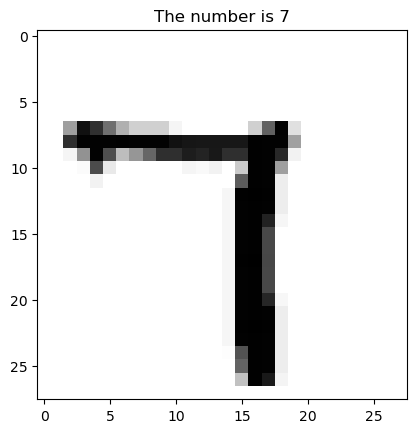

In [102]:
plt.figure()
n = random.randint(0, len(dataset_train)) #a random index
plt.imshow(dataset_train[n][0][0, :], cmap='Greys') # this is a 28x28 image. We represent it as grayscale (it is not RGB image)
plt.title(f'The number is {dataset_train[n][1]}')
plt.show()

 We define a function to compute accuracy and plot confusion matrix. We will use them multiple times later.

In [103]:
# define the function that calculate the accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred))
    return acc

# function to compute and plot the confusion matrix
def confusion_matrix(y_true, y_pred):
    df = pd.DataFrame([x for x in zip([x.item() for x in y_true], [x.item() for x in y_pred])], columns=['y_true', 'y_pred'])
    df[['samples']] = 1
    confusion = pd.pivot_table(df, index='y_true', columns='y_pred', values='samples', aggfunc=sum)
    plt.figure()
    sns.heatmap(confusion, cmap='Blues', annot=True, cbar_kws={'label':'Occurrences'}, fmt='g')
    plt.xlabel('Prediction')
    plt.ylabel('True')    
    plt.title('Confusion matrix')
    plt.show()

 Transform data into tensors and generate features and labels for train, validation and test.

In [104]:
#transform data into tensor X and tensor y
def get_data_label(dataset):
    # Initialize lists to store training data and labels
    data = []
    labels = []
    
    # Iterate through the dataset to extract data and labels
    for datum, label in dataset:
        data.append(datum)
        labels.append(torch.tensor([label]))
    
    # Concatenate the data and labels lists into tensors
    data = torch.cat(data, dim=0)
    labels = torch.cat(labels)
    
    return data, labels

In [105]:
X_train, y_train = get_data_label(dataset_train)
print(f"Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}")
X_val, y_val = get_data_label(dataset_val)
X_test, y_test = get_data_label(dataset_test)

Training data shape: torch.Size([50000, 28, 28]), Training labels shape: torch.Size([50000])


 The model architecture we are defining is a feed-forward neural network. It takes the input, feeds it through two hidden layers one after the other, and then finally gives the output. The input layer has many neurons as the pixels of the images, i.e., 28x28=784 neurons. The first hidden layer has 784 neurons and uses a tanh activation function. The second layer has 392 neurons and uses a tanh activation function. The output layer has 10 neurons, with softmax activation function.

![](basic_NN.png)

#### A typical training procedure for a neural network is as follows:
1. Define the neural network, the loss function and the optimizer
2. Iterate over a dataset of training inputs (training epochs)
3. Forward step: process input through the network
4. Compute the loss (empirical risk) 
5. Backward step (backpropagation): Compute and propagate gradients back into the network’s parameters
6. Update the weights of the network, typically using a variation of gradient descent step: $weight = weight - learning \ rate \times gradient$

In [106]:
# Define the neural network in the picture

class Model_classification(nn.Module): # a class that inherits from the module of pytorch neural network 
    def __init__(
        self, 
        in_features, # number of input features
        out_features, # number of output features
        hidden_1, # number of neurons in the 1st hidden layer
        hidden_2 # number of neurons in the 2nd hidden layer
    ):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=in_features, out_features=hidden_1) # 1st linear layer
        self.layer_2 = nn.Linear(in_features=hidden_1, out_features=hidden_2) # 2nd linear layer
        self.layer_output = nn.Linear(in_features=hidden_2, out_features=out_features) # output layer
        self.activation_1 = nn.Tanh() # activation function
        self.activation_2 = nn.Softmax() # activation function

    # define feedforward process
    def forward(self, x):
        x = x.flatten(start_dim=1) #to go from 28x28 image tensor to 784 input tensor
        out = self.activation_1(self.layer_1(x)) #output of 1st hidden layer
        out = self.activation_1(self.layer_2(out)) #output of 2nd hidden layer
        out = self.activation_2(self.layer_output(out)) #output of the nn
        return out

- For loss function, we are going to use the cross entropy loss
- For optimizer, the ADAM optimizer (a variant of classic gradient descent  https://en.wikipedia.org/wiki/Stochastic_gradient_descent#Adam)

In [107]:
# set a random seed 
torch.manual_seed(8)

# initialize the model with the correspoding parameters
dim_features = len(dataset_train[0][0].flatten())
model = Model_classification(
    in_features = dim_features, 
    out_features = 10, 
    hidden_1 = dim_features, 
    hidden_2 = int(dim_features / 2)
)

# define the loss function
loss_fn = nn.CrossEntropyLoss()

# define the optimizer (pass the parameters (model) that you want to optimize, and the learning rate)
optimizer = torch.optim.Adam(params=model.parameters(), lr=1e-3) 

Let's train the network for 10 epochs and keep track of the loss and accuracy on the training and validation after each epoch.

**Note** : if you run the following cell multiple times, the weights will not be re-initialized. Hence, you will continue the previous training each time. If you want to re-initialize the weights, re-define the model (i.e., run the previous cell)

In [108]:
# training process

loss_train_all = []
loss_val_all = []
acc_train_all = []
acc_val_all = []
epochs = 50

# Iterate over a dataset of inputs (training epochs)
for epoch in range(epochs):

    # model training phase
    model.train() #initialize training phase 
    y_prob = model(X_train).squeeze() #  Process input through the network. Get the output probability of predictions. We are using all the data and not in batches
    loss = loss_fn(y_prob, y_train) # calculate the empirical risk (average of the losses) 
    optimizer.zero_grad() # reset the gradients of model parameters
    loss.backward() # backpropagate the empirical risk (prediction loss)
    optimizer.step() # adjust the parameters by the gradients 

    # model evaluation phase
    model.eval() #initialize evaluation phase 
    
    # training set
    y_prob = model(X_train).squeeze() #  Process input through the network. Get the output probability of predictions. We are using all the data and not in batches
    y_pred = torch.argmax(y_prob, dim=1) # get the label --> multiclass, select the max of the softmax output
    acc_train = accuracy_fn(y_true=y_train, y_pred=y_pred)

    # validation set
    y_prob = model(X_val).squeeze() 
    loss_val = loss_fn(y_prob, y_val) 
    y_pred = torch.argmax(y_prob, dim=1)
    acc_val = accuracy_fn(y_true=y_val, y_pred=y_pred)

    # collect results
    loss_train_all.append(loss.item())
    loss_val_all.append(loss_val.item())
    acc_train_all.append(acc_train)
    acc_val_all.append(acc_val)
    
    print(f'Epoch: {epoch} | Train Loss: {loss:.5f}, Val Loss: {loss_val:.5f}, Train Acc: {acc_train:.2f}, Val Acc: {acc_val:.2f}') 

Epoch: 0 | Train Loss: 2.30380, Val Loss: 2.20155, Train Acc: 0.62, Val Acc: 0.62
Epoch: 1 | Train Loss: 2.20207, Val Loss: 2.07428, Train Acc: 0.60, Val Acc: 0.60
Epoch: 2 | Train Loss: 2.07652, Val Loss: 1.96530, Train Acc: 0.66, Val Acc: 0.67
Epoch: 3 | Train Loss: 1.96727, Val Loss: 1.87528, Train Acc: 0.74, Val Acc: 0.74
Epoch: 4 | Train Loss: 1.87714, Val Loss: 1.81259, Train Acc: 0.77, Val Acc: 0.77
Epoch: 5 | Train Loss: 1.81481, Val Loss: 1.76950, Train Acc: 0.79, Val Acc: 0.79
Epoch: 6 | Train Loss: 1.77182, Val Loss: 1.73050, Train Acc: 0.81, Val Acc: 0.81
Epoch: 7 | Train Loss: 1.73276, Val Loss: 1.70051, Train Acc: 0.83, Val Acc: 0.83
Epoch: 8 | Train Loss: 1.70286, Val Loss: 1.67712, Train Acc: 0.84, Val Acc: 0.85
Epoch: 9 | Train Loss: 1.67936, Val Loss: 1.65734, Train Acc: 0.86, Val Acc: 0.86
Epoch: 10 | Train Loss: 1.65921, Val Loss: 1.64157, Train Acc: 0.87, Val Acc: 0.87
Epoch: 11 | Train Loss: 1.64315, Val Loss: 1.62834, Train Acc: 0.87, Val Acc: 0.87
Epoch: 12 | Tr

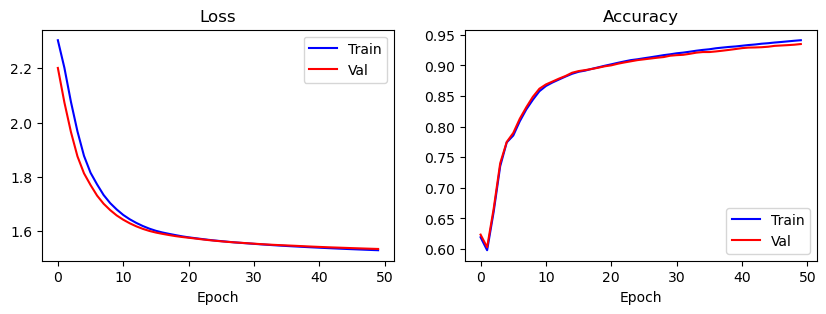

In [109]:
# visualize the evolution of losses and accuracies

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))

ax1.set_title('Loss')
ax1.set_xlabel('Epoch')
ax1.plot(loss_train_all, label='Train', color='blue')
ax1.plot(loss_val_all, label='Val', color='red')
ax1.legend()

ax2.set_title('Accuracy')
ax2.set_xlabel('Epoch')
ax2.plot(acc_train_all, label='Train', color='blue')
ax2.plot(acc_val_all, label='Val', color='red')
ax2.legend()

plt.show()

The accuracy is: 0.9349


/var/folders/yf/khhcc0jx1pg909227gmwfjk00000gn/T/ipykernel_91253/3612716615.py:11: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  confusion = pd.pivot_table(df, index='y_true', columns='y_pred', values='samples', aggfunc=sum)


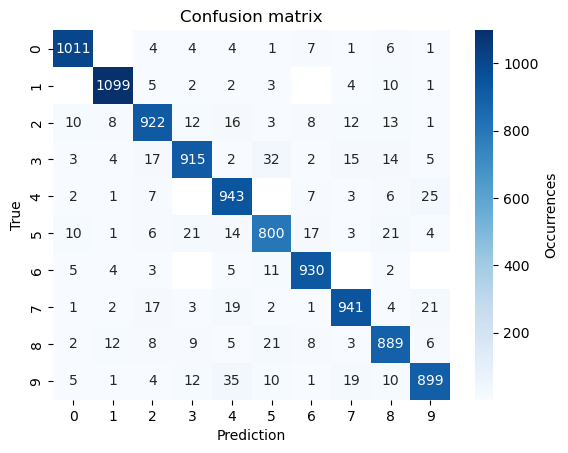

In [110]:
# visualize (final) confusion matrix on validation set

y_prob = model(X_val).squeeze() 
y_pred = torch.argmax(y_prob, dim=1)
acc_val = accuracy_fn(y_true=y_val, y_pred=y_pred)
print('The accuracy is:', acc_val)
confusion_matrix(y_val, y_pred)

#### Now you can try to repeat the process by changing some of the hyper-parameters of the neural network:
- number of layers
- number of neurons per layer
- activation functions

#### And some of the hyper-parameters of the training procedure:
- number of epochs
- learning rate
- version of the optimizer            

Finally, apply the chosen hypothesis on test data and measure the performance

The accuracy of test set is: 0.937


/opt/homebrew/Caskroom/miniconda/base/envs/ML4Engineering/lib/python3.13/site-packages/torch/nn/modules/module.py:1751: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
/var/folders/yf/khhcc0jx1pg909227gmwfjk00000gn/T/ipykernel_91253/3612716615.py:11: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  confusion = pd.pivot_table(df, index='y_true', columns='y_pred', values='samples', aggfunc=sum)


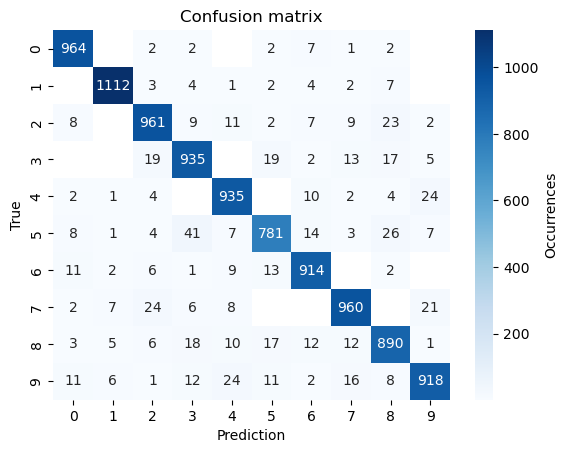

In [111]:
#Apply the model to test dataset

model.eval()
y_prob = model(X_test).squeeze()
y_pred = torch.argmax(y_prob, dim=1)
acc = accuracy_fn(y_true=y_test, y_pred=y_pred)
print('The accuracy of test set is:', acc)
confusion_matrix(y_test, y_pred)

Let's see some examples of sample with their prediction

/opt/homebrew/Caskroom/miniconda/base/envs/ML4Engineering/lib/python3.13/site-packages/torch/nn/modules/module.py:1751: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


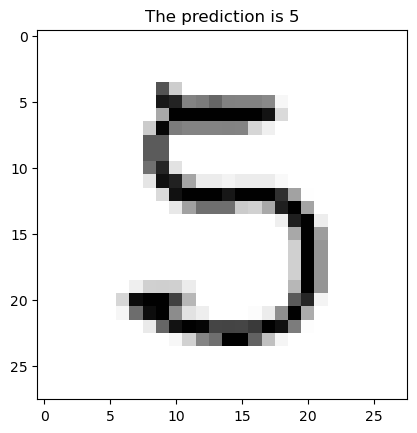

In [112]:
plt.figure()
n = random.randint(0, len(dataset_test))
model.eval()
y_prob = model(dataset_test[n][0]).squeeze()
y_pred = torch.argmax(y_prob)
plt.imshow(dataset_test[n][0][0, :], cmap='Greys') 
plt.title(f'The prediction is {y_pred}')
plt.show()

Now let's see and example of misclassified sample

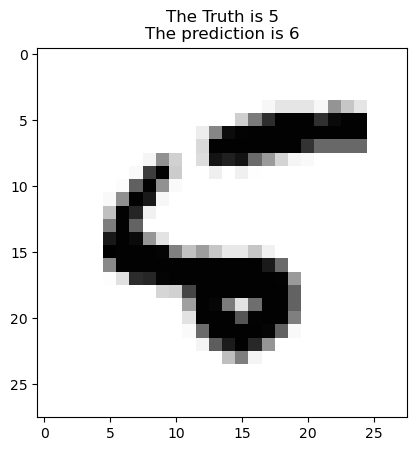

In [113]:
for n in range(len(dataset_test)):
    model.eval()
    y_prob = model(dataset_test[n][0]).squeeze()
    y_pred = torch.argmax(y_prob)
    true = dataset_test[n][1]
    if y_pred != true:
        plt.figure()
        plt.imshow(dataset_test[n][0][0, :], cmap='Greys')
        plt.title(f'The Truth is {true}\nThe prediction is {y_pred}')
        plt.show()
        break

### Deal with numpy data

For MNIST, pytorch handled the data transformation automatically, which is often not the case in reality. **Importantly, pytorch only works with torch tensor.** Therefore, for pandas or numpy data, the first thing you need to do after data processing and before feeding the data to the torch model is to convert your data into tensors!

In [114]:
# a 5x3 matrix (numpy multidimensional ndarray)
x = np.random.rand(5, 3)
x

array([[0.77873726, 0.24977136, 0.42184617],
       [0.8329513 , 0.14217844, 0.75275874],
       [0.17228413, 0.38652326, 0.12025443],
       [0.58453733, 0.74642545, 0.14613563],
       [0.76563184, 0.902741  , 0.07243004]])

In [115]:
#transforming the numpy multidimensional ndarray into a pytorch tensor
x_t = torch.tensor(x, dtype=torch.float, requires_grad=True) # Is True if gradients need to be computed for this Tensor
x_t

tensor([[0.7787, 0.2498, 0.4218],
        [0.8330, 0.1422, 0.7528],
        [0.1723, 0.3865, 0.1203],
        [0.5845, 0.7464, 0.1461],
        [0.7656, 0.9027, 0.0724]], requires_grad=True)

### Some remarks
1. For almost every function that you need to implement, like data loading, accuracy computation, batches and early stopping, you can find an implementation in pytorch or other libraries. In this lab, you can try to explore them on your own or implement the functions from scratch. 
2. It is easy to make errors regarding the dimension of tensors. Hint: use ``.shape`` to check out the shape of a tensor, and then check again the shape after performing certain operations.